### Types of Trends

* Deterministic Trends: They consistently increase or decrease and are easier to identify.
* Stochastic Trends: They increase and decrease inconsistently 

#### Detrend a time series is by differencing

### Example 15

####  Detrend a time series data (Shampoo sales) using differencing



D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


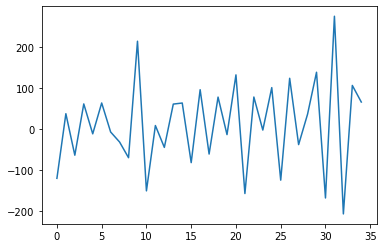

In [1]:
from    pandas             import   read_csv 
from    pandas             import   datetime 
import  matplotlib.pyplot  as       plt
from    datetime           import   datetime 

def parser(x): 
    return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('D:/shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser) 
X      = series.values 

diff = list() #creating an empty list
for i in range(1, len(X)): #defining the range of the iterative variable 'i' on the length of the values of the Time Series
     value = X[i] - X[i - 1] #differencing the series
     diff.append(value) #adding each differenced value to the empty list created above
plt.plot(diff) 
plt.show()

#### Inference

We don't see any particular trend in the data.

An identified trend can be modeled. Once modeled, it can be removed from the time series dataset. 

#### Detrend by model fitting

### Example 16

We will use Shampoo dataset.

* A linear model can be fit on the time index to predict the observation. 
* Get a trend line from the predictions from this model.
* Subtract these predictions from the original time series to provide a detrended version of the dataset.

We will use a scikit-learn LinearRegression model to train the data.

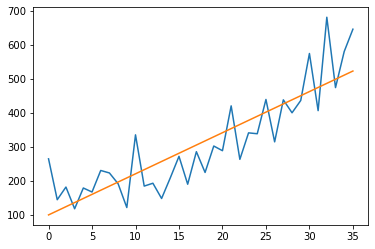

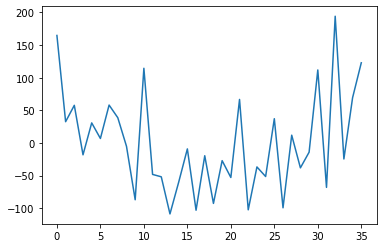

In [2]:
from     sklearn.linear_model import LinearRegression 
import   numpy  as np

# fit linear model 
X = [i for i in range(0, len(series))] 
X = np.reshape(X, (len(X), 1))
y = series.values 
model = LinearRegression() 
model.fit(X, y) 

# calculate trend 
trend = model.predict(X) 

# plot trend 
plt.plot(y) 
plt.plot(trend) 
plt.show() 

# detrend 
detrended = [y[i]-trend[i] for i in range(0, len(series))] 

# plot detrended 
plt.plot(detrended) 
plt.show()

#### Inference

We have plotted the trend line in orange colour over the original dataset in blue colour.

## Seasonal variation may be present in Time series data.

* Seasonal variation, or seasonality, are cycles that repeat regularly over time.

* By plotting and reviewing the data, you can determine if there is any seasonality in the data.
* We can try with different scales and by adding a trend line.
* Once the seasonality is identified, it can be modeled. When you remove the model of seasonality from the time series, it is called deseasonalizing or seasonal adjustment.

** Seasonal adjustment with differencing**

We can test the seasonality differencing method on the daily minimum temperature data.

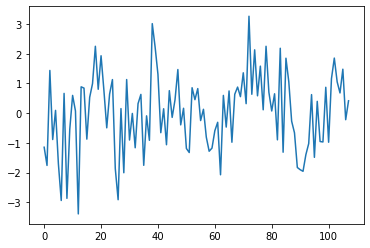

In [3]:
# deseasonalize monthly data by differencing 

import  pandas             as pd
import  matplotlib.pyplot  as plt

series         = pd.read_csv('D:/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
resample       = series.resample('M') 
monthly_mean   = resample.mean() 

X              = series.values 
diff           = list() 
months_in_year = 12 

for i in range(months_in_year, len(monthly_mean)): 
    value = monthly_mean[i] - monthly_mean[i - months_in_year] 
    diff.append(value) 

plt.plot(diff) 
plt.show()

### Accuracy measures

We would have used several models such as moving average, exponential smoothing, etc. before selecting the best model. 

The model selection may depend on the chosen forecasting accuracy measure such as: 

* Mean Absolute Error,  MAE = (1/n) (|Y1 - F1| + |Y2- F2| + ... + |Yn - Fn|)
* Mean Absolute Percentage Error,  MAPE = (1/n) ((|Y1 - F1|/Y1) + (|Y2 - F2|/Y2) + ... + (|Yn- Fn|/Yn) * 100)
* Mean Squared Error, MSE =  (1/n) ((Y1 - F1)^2 + (Y2- F2)^2 + ... + (Yn - Fn)^2)
* Root Mean Square Error, RMSE = square root of MSE

where n is the number of observations
Yn is the actual value of Y at time n
Fn is the corresponding forecasted value.
RMSE and MAPE are two most popular accuracy measures of forecasting.

### Example 17

Let us take the Daily Female Births Dataset as an example. 

This dataset describes the number of daily female births in California in 1959.

Fit a moving average of window width 3 and evalue the model measures such as RMSE and MAPE.

In [4]:
from   pandas               import  read_csv, datetime
import pandas               as      pd
import matplotlib.pyplot    as      plt
from   sklearn.metrics      import  mean_squared_error
import numpy                as      np
from   datetime             import  datetime

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


#### Define functions to calculate MAE  and MAPE 

In [5]:
def MAE(y,yhat):
    diff = np.abs(np.array(y)-np.array(yhat))
    try:
        mae =  round(np.mean(np.fabs(diff)),3)
    except:
        print("Error while calculating")
        mae = np.nan
    return mae

In [6]:
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.mean(np.abs((y - yhat) / y)) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

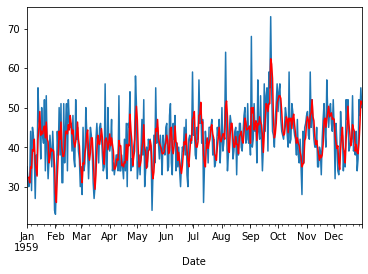

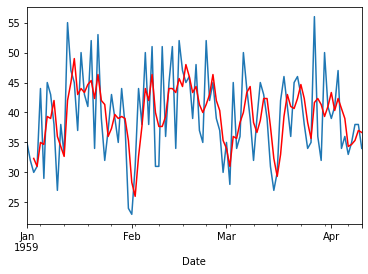

In [7]:
series       =  read_csv('D:/daily-total-female-births.csv',header=0, index_col=0, parse_dates=True, squeeze=True) 

# tail rolling average transform
rolling      =  series.rolling(window = 3) # arbitrarily chosen

rolling_mean =  rolling.mean()
series.plot()

rolling_mean.plot(color = 'red')
plt.show()

# Zoomed plot original and transformed dataset
series[:100].plot()
rolling_mean[:100].plot(color = 'red')
plt.show()

In [8]:
y_df = pd.DataFrame( {'Observed':series.values, 'Predicted':rolling_mean})
y_df .dropna(axis = 0, inplace = True)
print(y_df.tail())

rmse = np.sqrt(mean_squared_error(y_df.Observed, y_df.Predicted))
print("\n\n Accuracy measures ")
print('RMSE: %.3f' % rmse)
n = y_df.shape[0]

mae = MAE(y_df.Observed, y_df.Predicted)
print('MAE: %d' % np.float(mae))

mape = MAPE(y_df.Observed, y_df.Predicted)
print('MAPE: %.3f' % np.float(mape))

            Observed  Predicted
Date                           
1959-12-27        37  38.333333
1959-12-28        52  41.000000
1959-12-29        48  45.666667
1959-12-30        55  51.666667
1959-12-31        50  51.000000


 Accuracy measures 
RMSE: 5.435
MAE: 4
MAPE: 10.630


# END